# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


##### 1. H(Passed)

Number of "T" instances in `PASSED` column $= 4$

Number of "F" instances in `PASSED` column $= 2$

\begin{align*}
\therefore H(Passed) &= -\left[ \frac{4}{6}\ log_2  \left(\frac{4}{6}\right) + \frac{2}{6}\ log_2 \ \left(\frac{2}{6}\right) \right]\\
    &= - \frac{2}{3}\ log_2  \left(\frac{2}{3}\right) - \frac{1}{3}\ log_2 \ \left(\frac{1}{3}\right)\\
    &= - \frac{2}{3}\ (1 - 1.6) - \frac{1}{3}\ (0 - 1.6)\\
    &= 0.4 + 0.5333\\
    &= 0.9333
\end{align*}


##### 2. H(Passed | GPA)

$$H(Passed\ |\  GPA = L) = - 2 \times 1/2 \times log_2 (1/2) = 1$$

$$H(Passed\ |\  GPA = M) = - 2 \times 1/2 \times log_2 (1/2) = 1$$

$$H(Passed\ |\  GPA = H) = - 1 \times log_2(1) - 0 \times log_2 (0) = 0$$


\begin{align*}
\therefore {H(Passed\ |\  GPA)} &= P(GPA = L ) {H(Passed\ |\  GPA = L )} + P(GPA = M ) {H(Passed\ |\  GPA = M )} + P(GPA = H ) {H(Passed\ | \ GPA = H )}\\
    &= \frac{2}{6} \cdot 1 + \frac{2}{6} \cdot 1 + \frac{2}{6} \cdot 0\\
    &= \frac{1}{3} + \frac{1}{3}\\
    &= \frac{2}{3}\\
    &\text{or } 0.6667
\end{align*}


##### 3. H(Passed | Studied)

$$H(Passed\ | \ Studied = T) = - \frac{3}{3} \times log_2 \frac{3}{3} - 0 \times log_2 0 = - 1 log_2 1 = 0$$

$$H(Passed\ | \ Studied = F) = - \frac{1}{3} \times log_2 \frac{1}{3} - \frac{2}{3} \times log_2 \frac{2}{3} = 0.9333$$


\begin{align*}
\therefore H(Passed\ | \ Studied) &= P(Studied = T ) H(Passed \ | \ Studied = T ) + P(Studied = F ) H(Passed \ | \ Studied = F )\\
    &= \frac{3}{6} \cdot 0 + \frac{3}{6} \cdot 0.9333\\
    &= \frac{1}{2} \times 0.9333\\
    &= 0.4666
\end{align*}

#### 4. Full Decision Tree

The full Decision Tree learnt for this dataset is shown as follows:

<img src="./imgs/DT.png" width="500" alt="Decision Tree">

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

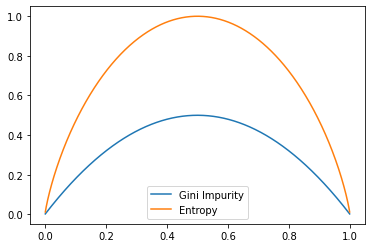

In [2]:
# 3. Plot the Gini impurity and Entropy for p in [0,1]

p = np.linspace(0.001,0.999,1000)

def gini_index(p):
    return 1 - p**2 - (1 - p)**2

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

gini = gini_index(p)
entropy = entropy(p)

plt.plot(p, gini, label = 'Gini Impurity')
plt.plot(p, entropy, label = 'Entropy')
plt.legend()
plt.show()

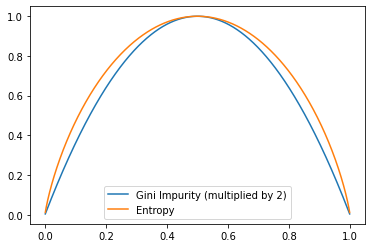

In [3]:
# 4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

gini_multiplied = 2 * gini

plt.plot(p, gini_multiplied, label = 'Gini Impurity (multiplied by 2)')
plt.plot(p, entropy, label = 'Entropy')
plt.legend()
plt.show()

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [4]:
# Download the data
!wget -N http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2022-11-09 17:51:11--  http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘spambase.data’ not modified on server. Omitting download.



In [46]:
# Load the data
df = pd.read_csv('spambase.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [60]:
# Split the data into features and labels
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X = X.to_numpy()
y = y.to_numpy()

You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [48]:
# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Initialize K and split the data
K = 10

# Split training set into training and validation sets
X_train_split = np.array_split(X_train, K)
y_train_split = np.array_split(y_train, K)

In [53]:
#Run the K fold Validation and report the scores
split_indices = np.arange(K)
training_scores = np.zeros(K)
validation_scores = np.zeros(K)
test_scores = np.zeros(K)

for i in range(K):
    
    dt_classifier = DecisionTreeClassifier()

    X_train_split_i = np.concatenate(X_train_split[:i] + X_train_split[i+1:])
    y_train_split_i = np.concatenate(y_train_split[:i] + y_train_split[i+1:])

    dt_classifier.fit(X_train_split_i, y_train_split_i)

    # Compute the training score
    train_score = dt_classifier.score(X_train_split_i, y_train_split_i)

    # Compute the validation score
    validation_score = dt_classifier.score(X_train_split[i], y_train_split[i])

    # Compute the test score
    test_score = dt_classifier.score(X_test, y_test)

    # Store the scores
    training_scores[i] = train_score
    validation_scores[i] = validation_score
    test_scores[i] = test_score
    

scores_df = pd.DataFrame({'Validation Split-Index': split_indices, 'Training Score': training_scores, 'Validation Score': validation_scores, 'Test Score': test_scores})
scores_df

,Validation Split-Index,Training Score,Validation Score,Test Score
0,0,0.999396,0.940217,0.933768
1,1,0.999094,0.913043,0.914224
2,2,0.999094,0.899457,0.928339
3,3,0.999396,0.907609,0.928339
4,4,0.999094,0.926630,0.929425
5,5,0.999396,0.918478,0.910966
6,6,0.999094,0.904891,0.926167
7,7,0.999094,0.907609,0.918567
8,8,0.999396,0.921196,0.920738
9,9,0.999396,0.915761,0.928339


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [95]:
def random_forest_algorithm(X_train, y_train, X_test, y_test, n_estimators=100, n_features=27): # Pass necessary params as per requirements
    
    def bootstrap():
        """Bootstrap data (Feature selection with replacement)"""
        
        # Get random feature indices
        feature_indices = np.random.randint(0, X_train.shape[1], n_features)

        X_train_bootstrapped = X_train[:, feature_indices]
        X_test_bootstrapped = X_test[:, feature_indices]

        return X_train_bootstrapped, X_test_bootstrapped

    def DecisionTree():
        """Train and Predict on the bootstrapped data using Decision Tree"""

        dt_classifier = DecisionTreeClassifier()
        X_train_bootstrapped, X_test_bootstrapped = bootstrap()

        dt_classifier.fit(X_train_bootstrapped, y_train)
        return dt_classifier.predict(X_test_bootstrapped)

    def bagging():
        """Creates a bag of decision trees and returns the aggregated predictions"""
        predictions = np.zeros((X_test.shape[0], n_estimators), dtype=np.int64)
        
        predictions = np.apply_along_axis(lambda x: DecisionTree(), 0, predictions)

        # for i in range(n_estimators):
        #     predictions[:, i] = DecisionTree()
        
        # Aggregate the predictions
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), 1, predictions)

    
    rf_prediction = bagging()
    rf_accuracy = np.sum(rf_prediction == y_test) / y_test.shape[0]

    print("Accuracy of Random Forest:", rf_accuracy)

In [97]:
random_forest_algorithm(X_train, y_train, X_test, y_test)

Accuracy of Random Forest: 0.9695982627578719
